In [1]:
import os

In [2]:
print(os.getcwd())
print(os.listdir)

C:\Users\a.maqsood\Jupyter_Practice
<built-in function listdir>


In [3]:
print(os.listdir(os.getcwd()))

['.ipynb_checkpoints', 'Besham_streamflow.xlsx', 'Dailyflow_to_annual_max_min.ipynb', 'Discharge_Upper Indus gauges_Ram.xlsx', 'elevation-profile_Olympics.csv', 'lab3-1_solution.ipynb', 'lab5-1.ipynb', 'lab5-2.ipynb', 'lab5-3.ipynb', 'LL_Rainfall Dist.ipynb', 'Markdown Formatting.ipynb', 'Peakflow_analysis.ipynb', 'probability-distributions.ipynb', 'Rainfall_CHIRPS - Copy.xlsx', 'Rainfall_CHIRPS.xlsx', 'streamflow_summary.xlsx', 'Trend Analysis_flow.ipynb', 'Wet Days.ipynb', 'Z_Hypothesis testing.ipynb']


In [4]:
import pandas as pd


In [5]:
file_path = 'Rainfall_CHIRPS.xlsx'
data = pd.read_excel(file_path)

data

,Date,CHIRPS (mm)
0,2000-01-01,0.0
1,2000-01-02,0.0
2,2000-01-03,0.0
3,2000-01-04,0.0
4,2000-01-05,0.0
...,...,...
8761,2023-12-27,0.0
8762,2023-12-28,0.0
8763,2023-12-29,0.0
8764,2023-12-30,0.0


### This part of script finds out minimum, average and maximum number of wet days for the given time series.
It is done so by resampling the series by months. Furthermore, the script tells us about the years when the minimum and maximum wet days occurred. An assumption has made for considering wet day: Precipitation data > 2.5 mm. You can change according to you requirement.

In [6]:
data['Date'] = pd.to_datetime(data['Date'])

data.set_index('Date', inplace=True)

wet_days = data[data['CHIRPS (mm)'] > 2.5]

monthly_wet_days = wet_days.resample('M').size()
# Finds the minimum, average and maximum NUMBER of wet days in the time series
average_wet_days_per_month = monthly_wet_days.groupby(monthly_wet_days.index.month).mean()
min_wet_days_per_month = monthly_wet_days.groupby(monthly_wet_days.index.month).min()
max_wet_days_per_month = monthly_wet_days.groupby(monthly_wet_days.index.month).max()

# Finds the years where minimum and maximum wet days occurred
min_wet_days_year = monthly_wet_days.groupby(monthly_wet_days.index.month).idxmin().apply(lambda x: x.year)
max_wet_days_year = monthly_wet_days.groupby(monthly_wet_days.index.month).idxmax().apply(lambda x: x.year)


# print(average_wet_days_per_month, min_wet_days_per_month, max_wet_days_per_month)
wet_days_summary = pd. DataFrame({
    'Min Wet Days': min_wet_days_per_month,
    'Avg Wet Days': average_wet_days_per_month,
    'Max Wet Days': max_wet_days_per_month, 
    'Min WDs Year': min_wet_days_year,
    'Max WDs Year': max_wet_days_year
})

print(wet_days_summary)

      Min Wet Days  Avg Wet Days  Max Wet Days  Min WDs Year  Max WDs Year
Date                                                                      
1                1      3.500000             9          2010          2019
2                1      4.083333             9          2004          2011
3                2      4.166667            12          2004          2019
4                1      3.000000             6          2000          2001
5                0      1.333333             4          2000          2014
6                0      0.125000             1          2000          2007
7                0      1.708333            10          2000          2022
8                0      0.875000             5          2000          2022
9                0      0.000000             0          2000          2000
10               0      0.083333             1          2000          2015
11               0      0.666667             2          2000          2002
12               1      2

### This part of script calculates the monthly average precipitation for the given time series as well as the monthly minimum precipitation and maximum precipitation along with information of respective years.
You will see in the results, that the year "2000" shows up consistently for many years where minimum average precipitation occurred, which is indicative of 2000 being a dry or drought year.

In [7]:
# Resample to mothly frequency and calculate the sum of precipitation for each month
monthly_precipitation = data['CHIRPS (mm)'].resample('M').sum()

min_precipitation = monthly_precipitation.groupby(monthly_precipitation.index.month).min()
avg_precipitation = monthly_precipitation.groupby(monthly_precipitation.index.month).mean()
max_precipitation = monthly_precipitation.groupby(monthly_precipitation.index.month).max()
# Finds the years where minimum, average and maximum PRECIPITATION occurred
min_precip_year = monthly_precipitation.groupby(monthly_precipitation.index.month).idxmin().apply(lambda x: x.year)
max_precip_year = monthly_precipitation.groupby(monthly_precipitation.index.month).idxmax().apply(lambda x: x.year)


# Combine the results into a DataFrame
precip_summary = pd.DataFrame({
    'Min Precip(mm)': min_precipitation,
    'Avg Precip(mm)': avg_precipitation,
    'Max Precip(mm)': max_precipitation,
    'Min_year': min_precip_year,
    'Max_year': max_precip_year
})

# Print the summary
print(precip_summary)

      Min Precip(mm)  Avg Precip(mm)  Max Precip(mm)  Min_year  Max_year
Date                                                                    
1            19.1209       55.371813        212.1180      2018      2017
2             8.6732       46.190833        111.3397      2021      2011
3            17.7298       57.112492        151.1922      2004      2019
4             9.1916       29.662833         70.4753      2022      2019
5             0.0000        9.054571         28.6645      2000      2014
6             0.0000        0.891392          5.8994      2000      2007
7             0.0000       10.465542         53.1135      2000      2022
8             0.0000        5.618079         37.4654      2000      2022
9             0.0000        0.025692          0.3183      2000      2005
10            0.0000        0.517808          5.3521      2000      2015
11            0.0000        5.682733         35.9876      2000      2019
12           12.2081       27.614971         63.405

### Let plot and format the calculated dataframe

In [9]:
import matplotlib.pyplot as plt

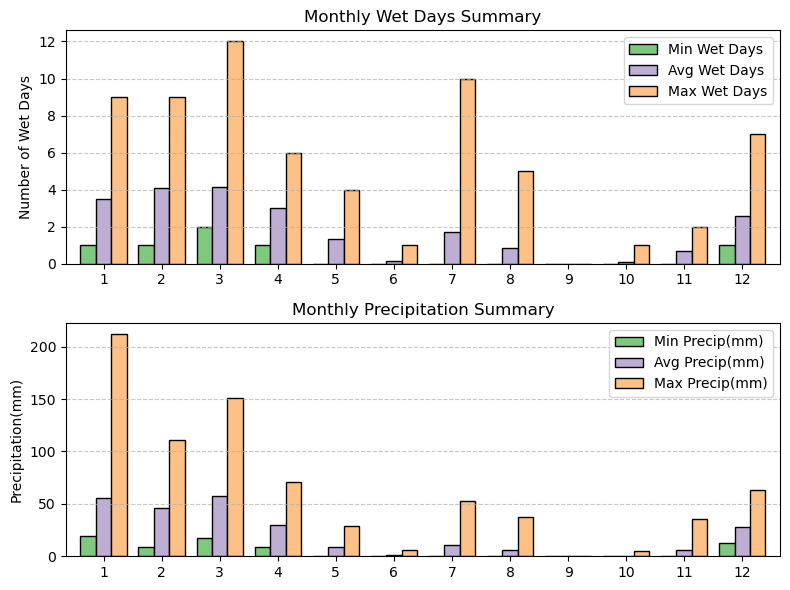

In [10]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(8,6))
# https://matplotlib.org/stable/users/explain/colors/colormaps.html

wet_days_summary.iloc[:, :3].plot(kind='bar', ax=ax1, edgecolor='black', color=plt.cm.Accent.colors, width=0.8, legend=True)
#  hatch='/',
ax1.set_title('Monthly Wet Days Summary')
ax1.set_xlabel('')
ax1.set_ylabel('Number of Wet Days')
ax1.grid(axis='y', linestyle='--', alpha=0.7)
ax1.legend(loc='upper right')
ax1.set_xticklabels(wet_days_summary.index, rotation=0)

precip_summary.iloc[:, :3].plot(kind='bar', ax=ax2, edgecolor='black',color=plt.cm.Accent.colors, width=0.8, legend=True)
ax2.set_title('Monthly Precipitation Summary')
ax2.set_xlabel('')
ax2.set_ylabel('Precipitation(mm)')
ax2.grid(axis='y', linestyle='--', alpha=0.7)
ax2.legend(loc='upper right')
ax2.set_xticklabels(precip_summary.index, rotation=0)

plt.tight_layout()
plt.show()